LAB 04 - Klasyfikacja - Ignacy Szkudelski

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

Ex. 1 - kNN - own implementation

Please provide your own implementation of the “K nearest neighbors” algorithm.

Task:

1. Iris database - please divide into training and test sets
2. Find the best value of k for the selected test set (show on the graph change of k and the error - for both the test and training sets)

    1. We choose the value of k (np. from 1 to n, where n will be the value for which the algorithm's results will deteriorate again)
    2. For each example in the test set, we look for the k observations that are closest to our analyzed example. Use the Eukleidesa distance to determine the distance.
    3. The advantage of a given class among the “k” closest neighbors (from the training set) proves that the example belongs to this class.
    4. Use the most frequent value of the “k” nearest neighbors“ as the value for an unclassified example.
    5. For each case of k, after classifying all examples in the test set, count the error (e.g. the number of examples wrongly classified to the set size) and write the pair (k - error) to collect data for summary graphs.

In [54]:
iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

def calc_distances(feature, features):
    distances = []
    for train_feat in features:
            dst = distance.euclidean(train_feat, feature)
            distances.append(dst)
    return distances

def get_nearest_neigtbours_and_distances(distances,labels,k):
    dist_lab = list(zip(distances,labels))
    dist_lab.sort(key=lambda x: x[0])
    return dist_lab[:k]

# Użyłem sumy dystansów najbliższych sąsiadów zamiast najczęstszego sąsiada 
def sum_labels_distances(labels, dist_lab_sorted):
    keys = set(labels)
    label_values = dict.fromkeys(keys,np.Inf)
    for dist_lab in dist_lab_sorted:
        if label_values[dist_lab[1]] is np.Inf:
            label_values[dist_lab[1]] = 0
        label_values[dist_lab[1]] += dist_lab[0]
    return label_values
        
def calc_label(distances,labels,k):
    dist_lab_sorted = get_nearest_neigtbours_and_distances(distances,labels,k)
    label_values = sum_labels_distances(labels, dist_lab_sorted)
    label = min(label_values, key=label_values.get)
    return label
    
            
def calc_labels(features_train, features_test, labels_train,k):
    predicted_labels = []
    for feature in features_test:
        distances = calc_distances(feature, features_train)
        label = calc_label(distances,labels_train,k)
        predicted_labels.append(label)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

for k in range(1,21):
    predicted_labels = calc_labels(features_train, features_test, labels_train,k)
    accuracy_tabele = predicted_labels == labels_test
    output = accuracy_score(labels_test, predicted_labels)
    print(f"K = {k}: [Error cases, True cases]: {np.bincount(accuracy_tabele)}, accuracy_score: {output}")
"""
Okazało się że modyfikacja metody poprzez zmianę 
sopsobu obliczania klasy doprowadziła do innych wyników które jednak
są gorsze od algorytmu zaimplementowanego w bibliotece
"""


K = 1: [Error cases, True cases]: [ 2 43], accuracy_score: 0.9555555555555556
K = 2: [Error cases, True cases]: [ 2 43], accuracy_score: 0.9555555555555556
K = 3: [Error cases, True cases]: [ 2 43], accuracy_score: 0.9555555555555556
K = 4: [Error cases, True cases]: [ 5 40], accuracy_score: 0.8888888888888888
K = 5: [Error cases, True cases]: [ 4 41], accuracy_score: 0.9111111111111111
K = 6: [Error cases, True cases]: [ 5 40], accuracy_score: 0.8888888888888888
K = 7: [Error cases, True cases]: [ 5 40], accuracy_score: 0.8888888888888888
K = 8: [Error cases, True cases]: [ 6 39], accuracy_score: 0.8666666666666667
K = 9: [Error cases, True cases]: [ 6 39], accuracy_score: 0.8666666666666667
K = 10: [Error cases, True cases]: [10 35], accuracy_score: 0.7777777777777778
K = 11: [Error cases, True cases]: [11 34], accuracy_score: 0.7555555555555555
K = 12: [Error cases, True cases]: [12 33], accuracy_score: 0.7333333333333333
K = 13: [Error cases, True cases]: [11 34], accuracy_score: 0

'\nOkazało się że modyfikacja metody poprzez zmianę \nsopsobu obliczania klasy doprowadziła do innych wyników które jednak\nsą gorsze od algorytmu zaimplementowanego w bibliotece\n'

Ex. 2 - kNN - Python (sklearn)

Please solve the above problem using the library sklearn.neighbors.KNeighborsClassifier in order to check the correct implementation of the kNN algorithm
Useful libraries and functions:

In [55]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,21):
    knc = KNeighborsClassifier(k)
    knc.fit(features_train, labels_train)
    predicted_labels = knc.predict(features_test)
    accuracy_tabele = predicted_labels == labels_test
    output = accuracy_score(labels_test, predicted_labels)
    print(f"K = {k}: [Error cases, True cases]: {np.bincount(accuracy_tabele)}, accuracy_score: {output}")



K = 1: [Error cases, True cases]: [ 2 43], accuracy_score: 0.9555555555555556
K = 2: [Error cases, True cases]: [ 3 42], accuracy_score: 0.9333333333333333
K = 3: [Error cases, True cases]: [ 2 43], accuracy_score: 0.9555555555555556
K = 4: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 5: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 6: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 7: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 8: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 9: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 10: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 11: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 12: [Error cases, True cases]: [ 1 44], accuracy_score: 0.9777777777777777
K = 13: [Error cases, True cases]: [ 2 43], accuracy_score: 0

Ex.3 - Decision trees

In [56]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [57]:
clf.predict(iris.data[:1, :])

array([0])

In [58]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [59]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# graph[0].write_pdf("iris.pdf")
# powyższe liniki niestety nie działa - pojawia się błąd z któreym sobie nie poradziłem

Exercise

In [60]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
# wczytywanie danych
import my_mnist as mnist

# mnist.init()
x_train, t_train, x_test, t_test = mnist.load()

Ex.1.Divide the data into parameters X and answer y:

In [61]:
X = np.concatenate([x_train,x_test]) #TODO
y = np.concatenate([t_train,t_test]) #TODO

In [62]:
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

# Convert digit 10 -> 0 (error in the dataset)
y[np.where(y==10)]=0

# the height and width of the picture with the number
h = 28
w = 28

In [63]:
# Ex 2. Please display the number of digits and the number of pixels per image

In [64]:
"digits nr: {},  pixels: {}".format(*X.shape)

'digits nr: 70000,  pixels: 784'

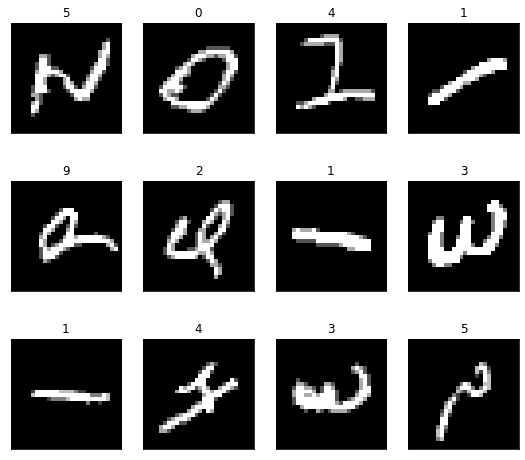

In [65]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
plot_mnist(X, y, h, w, n_row=3, n_col=4)

Ex. 3. Please display sample digits from the dataset (function, plot_mnist).

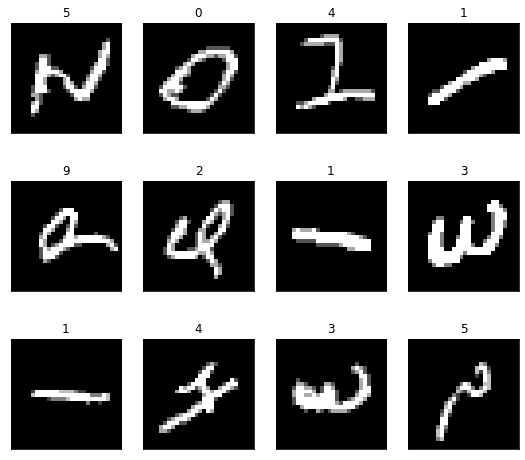

In [66]:
plot_mnist(X, y, h, w, n_row=3, n_col=4)

Ex. 4. Please divide the dataset into learner (70%) and training.

In [67]:
x_train, x_test, t_train, t_test = train_test_split(X,y,test_size=0.3)

Ex. 5. Create an instance of the classifier, then train and predict for test data.
Tree parameters:

In [68]:
print(x_train.shape,t_train.shape)
# shapes

(49000, 784) (49000,)


In [69]:
DEPTH = 10
tc = tree.DecisionTreeClassifier(max_depth=DEPTH)
tc.fit(x_train, t_train)
predict_result = tc.predict(x_test)

Zad 6. Please provide F1 result, confusion matrix and classification report. 

In [71]:
print(classification_report(t_test,predict_result))

# macierz zawiera wpisy ile próbek miało być w klasie o indeksie wiersza a zostało zaklasyfikowanych do klasy o indeksie kolumny
print("f1 score:", f1_score(t_test,predict_result,average='weighted'))
confusion_matrix(t_test,predict_result)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2089
           1       0.94      0.94      0.94      2362
           2       0.79      0.82      0.80      2106
           3       0.81      0.76      0.78      2064
           4       0.81      0.82      0.81      2075
           5       0.71      0.77      0.74      1955
           6       0.87      0.89      0.88      2023
           7       0.89      0.87      0.88      2167
           8       0.83      0.76      0.80      2090
           9       0.77      0.78      0.78      2069

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.84      0.83      0.83     21000

f1 score: 0.8341727733268528


array([[1888,    0,   34,   28,   28,   45,   21,   13,   26,    6],
       [   2, 2217,   33,   22,   10,   19,   17,   16,   23,    3],
       [  44,   21, 1729,   41,   34,   29,   51,   48,   88,   21],
       [  15,   19,   80, 1570,   22,  200,   22,   35,   46,   55],
       [   7,    9,   38,   14, 1706,   64,   42,   15,   15,  165],
       [  35,   14,   45,  151,   46, 1513,   44,   21,   47,   39],
       [  30,    3,   42,    5,   44,   54, 1798,   11,   32,    4],
       [   2,   18,   66,   25,   31,   25,    3, 1875,   26,   96],
       [  22,   36,   87,   39,   62,   77,   66,   21, 1595,   85],
       [   7,   10,   41,   52,  134,  107,   13,   63,   22, 1620]],
      dtype=int64)